Dane wczytane. X: (23, 35), X': (23, 35)

Błąd rekonstrukcji (norma Frobeniusa): 0.000000

Przybliżona macierz A (fragment 5x5):
[[ 0.68147246  0.07883378  0.10371455  0.60117676 -0.20232295]
 [ 0.01558785  0.18719588 -0.22900533  0.57945999 -0.26879542]
 [ 0.07236715 -0.40452242  0.97264753  0.2734825  -0.306115  ]
 [ 0.00471716 -0.0588719  -0.42101362  0.63008758 -0.05885765]
 [-0.20715697 -0.26351577 -0.23748037  0.08435472  0.96878015]]

Wartości własne (Eigenvalues):
[7.07000787e-03+0.00000000e+00j 1.60304017e-08+0.00000000e+00j
 3.10829670e-12+0.00000000e+00j 1.34516279e-16+0.00000000e+00j
 9.99990336e-01+0.00000000e+00j 1.00000354e+00+6.86023312e-06j
 1.00000354e+00-6.86023312e-06j 9.99998356e-01+5.30111765e-06j
 9.99998356e-01-5.30111765e-06j 1.00000014e+00+0.00000000e+00j
 1.00000000e+00+8.10744877e-09j 1.00000000e+00-8.10744877e-09j
 9.99999998e-01+0.00000000e+00j 1.00000000e+00+5.77931286e-10j
 1.00000000e+00-5.77931286e-10j 9.99999999e-01+0.00000000e+00j
 1.00000000e+00+0.0

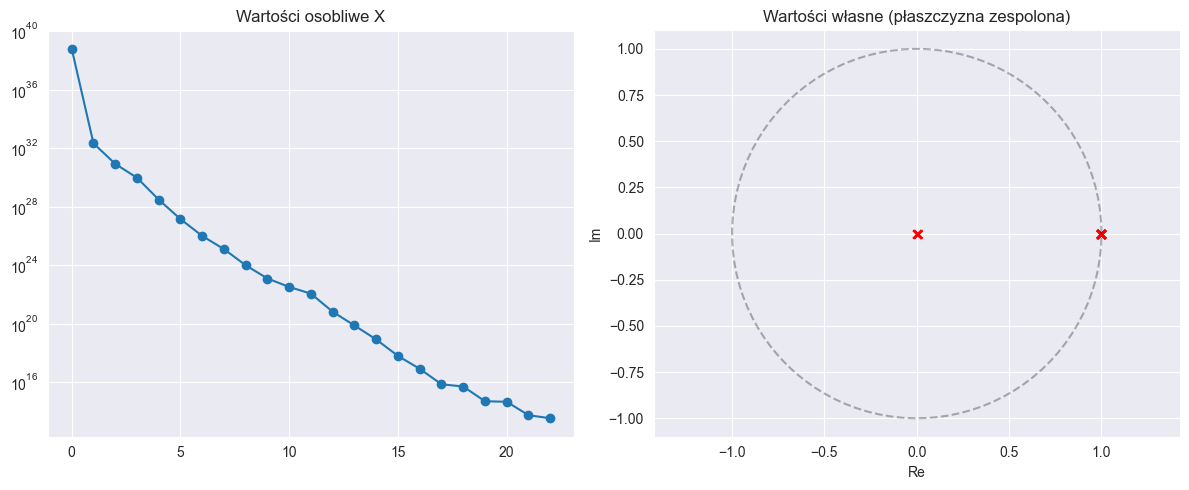

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# wczytanie danych
try:
    # X posiada kolumnę indeksową (pierwszą), X' jej nie ma
    # Separator średnik, format liczb polski (przecinek)
    df_x = pd.read_csv('War7_X.csv', sep=';', decimal=',', header=None)
    df_xp = pd.read_csv('War7_Xprime.csv', sep=';', decimal=',', header=None)

    # Konwersja do numpy float, pomijamy indeks w X
    X = df_x.iloc[:, 1:].values.astype(float)
    X_prime = df_xp.values.astype(float)

    # Wyrównanie liczby kolumn (snapshots)
    min_cols = min(X.shape[1], X_prime.shape[1])
    X = X[:, :min_cols]
    X_prime = X_prime[:, :min_cols]

    print(f"Dane wczytane. X: {X.shape}, X': {X_prime.shape}")

except FileNotFoundError:
    print("Błąd: Brak plików CSV w katalogu.")
    raise

# Algorytm DMD

# 1. Rozkład SVD macierzy X
U, s, Vh = np.linalg.svd(X, full_matrices=False)
V = Vh.T.conj()

# 2. Obliczenie macierzy A
# A = X' * pseudoodwrotność(X)
# Wykorzystujemy rozkład SVD: pinv(X) = V * S^-1 * U^T
S_inv = np.diag(1 / s)
A_approx = X_prime @ V @ S_inv @ U.T.conj()

# 3. Wartości własne (dynamika)
# Obliczane na zredukowanej macierzy A_tilde dla stabilności numerycznej
A_tilde = U.T.conj() @ X_prime @ V @ S_inv
eig_vals, eig_vecs = np.linalg.eig(A_tilde)

# Weryfikacja błędu rekonstrukcji
X_pred = A_approx @ X
error_norm = np.linalg.norm(X_prime - X_pred) / np.linalg.norm(X_prime)

# Wyniki
print(f"\nBłąd rekonstrukcji (norma Frobeniusa): {error_norm:.6f}")
print("\nPrzybliżona macierz A (fragment 5x5):")
print(np.real(A_approx[:5, :5]))
print("\nWartości własne (Eigenvalues):")
print(eig_vals)

# Wykresy
plt.figure(figsize=(12, 5))

# Rozkład wartości osobliwych
plt.subplot(1, 2, 1)
plt.semilogy(s, 'o-')
plt.title("Wartości osobliwe X")
plt.grid(True)

# Widmo macierzy A
plt.subplot(1, 2, 2)
theta = np.linspace(0, 2*np.pi, 100)
plt.plot(np.cos(theta), np.sin(theta), 'k--', alpha=0.3) # Okrąg jednostkowy
plt.scatter(eig_vals.real, eig_vals.imag, c='red', marker='x')
plt.title("Wartości własne (płaszczyzna zespolona)")
plt.xlabel("Re")
plt.ylabel("Im")
plt.grid(True)
plt.axis('equal')

plt.tight_layout()
plt.show()